In [39]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [117]:
import gsw

In [7]:
era_path = "data/zip_Group9/ERA5_combined_5905505.nc"
argo_path = "data/zip_Group9/BGCArgo_combined_5905505.nc"

In [10]:
era = xr.load_dataset(era_path)
era

<xarray.Dataset> Size: 9kB
Dimensions:   (prof: 155)
Coordinates:
  * prof      (prof) int64 1kB 0 1 2 3 4 5 6 7 ... 148 149 150 151 152 153 154
Data variables:
    t2m       (prof) float32 620B 290.3 289.3 291.3 290.6 ... 286.0 286.8 288.0
    u10       (prof) float32 620B -1.877 7.543 3.997 ... -3.226 1.731 8.236
    v10       (prof) float32 620B 3.636 6.893 -4.479 ... 0.1442 0.02925 -0.2156
    tcc       (prof) float32 620B 0.6518 0.7423 0.998 ... 0.2434 0.965 0.1823
    msl       (prof) float32 620B 1.014e+05 1.012e+05 ... 1.033e+05 1.022e+05
    mtpr      (prof) float32 620B 9.537e-07 0.0 ... 7.227e-07 2.867e-06
    msdwswrf  (prof) float32 620B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon       (prof) float64 1kB 155.5 155.7 155.8 156.0 ... 163.8 164.2 164.8
    lat       (prof) float64 1kB -40.67 -40.74 -40.8 ... -38.91 -39.23 -39.32
    time      (prof) datetime64[ns] 1kB 2022-03-21T13:46:00 ... 2024-08-23T19...

In [72]:
u, v = era["u10"].values, era["v10"].values
ws = np.sqrt(u**2 + v**2)
wd = 90 - np.arctan(u,v)*180.0 /np.pi

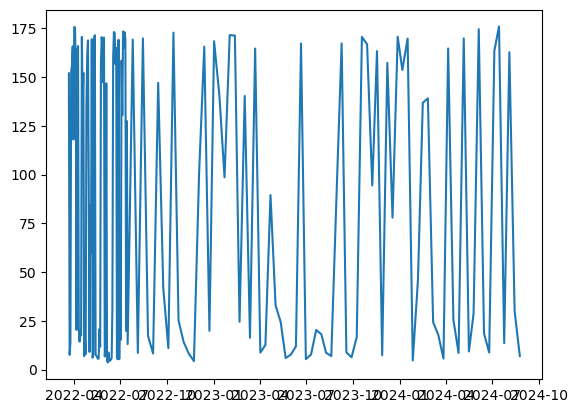

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(era["time"],wd)
plt.show()

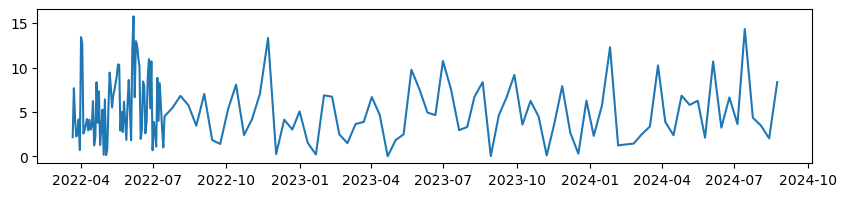

In [112]:
fig = plt.figure(figsize=(10,2))
ax = fig.add_subplot(111)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.plot(era["time"],ws)
plt.show()

In [ ]:
gsw.density.sigma0(argo)

In [9]:
argo = xr.load_dataset(argo_path)
argo

<xarray.Dataset> Size: 5MB
Dimensions:           (prof: 155, pres: 500)
Coordinates:
  * prof              (prof) int64 1kB 0 1 2 3 4 5 6 ... 149 150 151 152 153 154
  * pres              (pres) int64 4kB 0 2 4 6 8 10 ... 988 990 992 994 996 998
Data variables:
    lon               (prof) float64 1kB 155.5 155.7 155.8 ... 163.8 164.2 164.8
    lat               (prof) float64 1kB -40.67 -40.74 -40.8 ... -39.23 -39.32
    time              (prof) datetime64[ns] 1kB 2022-03-21T13:46:00 ... 2024-...
    TEMP              (prof, pres) float64 620kB nan 19.92 19.92 ... 5.117 5.107
    PSAL              (prof, pres) float64 620kB nan 35.49 35.49 ... 34.44 34.44
    NITRATE           (prof, pres) float64 620kB nan -0.2983 ... 29.65 29.68
    PH_IN_SITU_TOTAL  (prof, pres) float64 620kB nan 8.11 8.109 ... 7.916 7.916
    BBP700            (prof, pres) float64 620kB nan 0.0009534 ... 0.0003499
    CHLA              (prof, pres) float64 620kB nan 0.605 ... 0.05339 0.05121
    DOWNWELLING_PAR   (prof, pres) float64 620kB nan 0.1077 0.1158 ... nan nan
    DOXY              (prof, pres) float64 620kB nan 208.3 208.1 ... 172.2 172.2

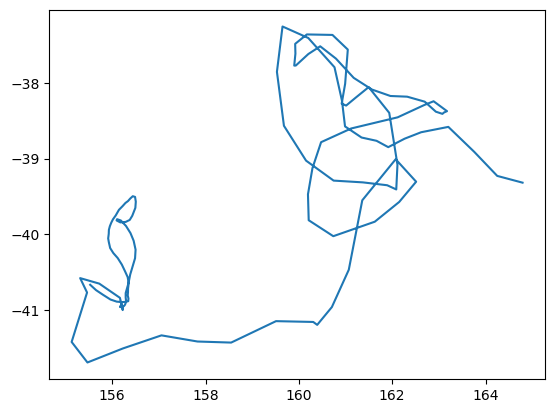

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(10,25)
#ax.set_ylim(10,25)
ax.plot(argo["lon"],argo["lat"])
plt.show()

In [30]:
argo["prof"].values.shape

(155,)

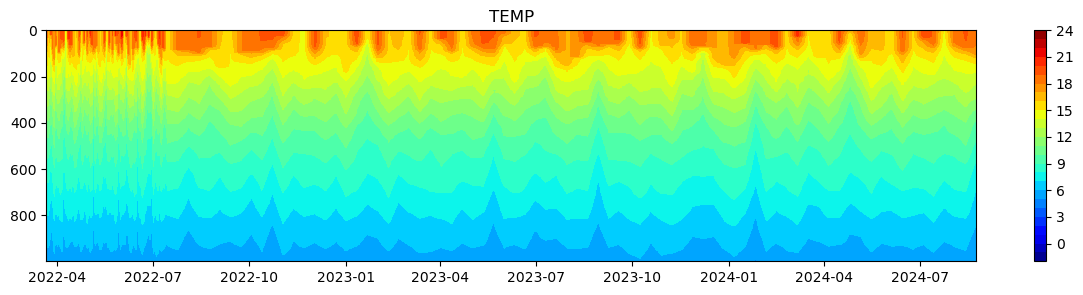

In [53]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

ax.invert_yaxis()
ax.set_title("TEMP")
cf = ax.contourf(argo["time"],
                 argo["pres"],
                 argo["TEMP"].values.T,cmap="jet",
                 levels=np.arange(-2,25,1))
fig.colorbar(
            cf,
            orientation="vertical",
        )


plt.show()

In [59]:
t2m = era.sel(time=slice(datetime(2023,1,1),datetime(2023,12,31)))

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(211)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.set_xlim(datetime(2023,1,1),datetime(2023,12,31))
ax.invert_yaxis()
ax.set_title("T2m 2023")
ax.plot(era["time"],era["t2m"])


ax = fig.add_subplot(212)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))
ax.set_xlim(datetime(2023,1,1),datetime(2023,12,31))
ax.invert_yaxis()
ax.set_title("TEMP 2023")
cf = ax.contourf(argo["time"],
                 argo["pres"],
                 argo["TEMP"].values.T,cmap="jet",
                 levels=np.arange(-2,25,1))
fig.colorbar(
            cf,
            orientation="vertical",
        )


plt.show()

KeyError: "'time' is not a valid dimension or coordinate for Dataset with dimensions FrozenMappingWarningOnValuesAccess({'prof': 155})"

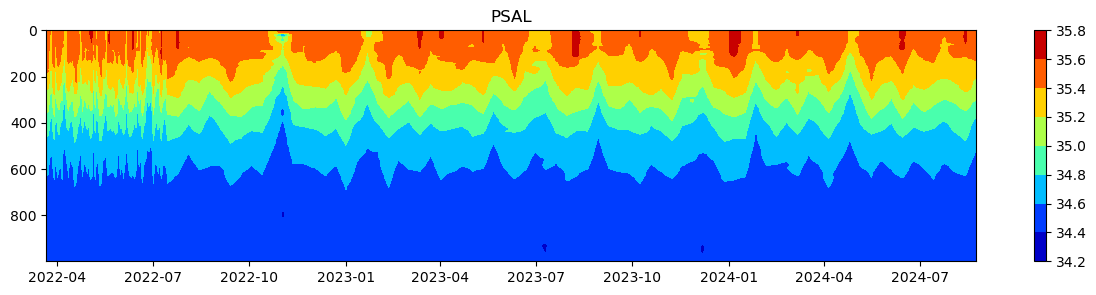

In [51]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.invert_yaxis()
ax.set_title("PSAL")
cf = ax.contourf(argo["time"],
                 argo["pres"],
                 argo["PSAL"].values.T,cmap="jet",
                 #levels=np.arange(-2,25,1),
                 )
fig.colorbar(
            cf,
            orientation="vertical",
        )


plt.show()

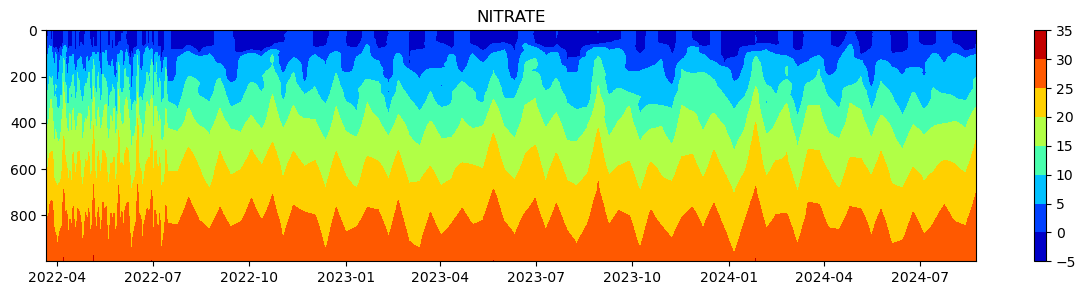

In [50]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.invert_yaxis()
ax.set_title("NITRATE")
cf = ax.contourf(argo["time"],
                 argo["pres"],
                 argo["NITRATE"].values.T,cmap="jet",
                 #levels=np.arange(-2,25,1),
                 )
fig.colorbar(
            cf,
            orientation="vertical",
        )


plt.show()

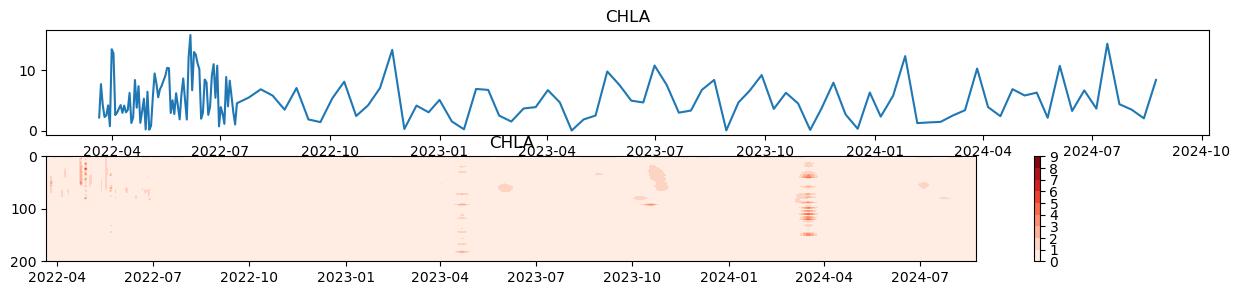

In [81]:
chla = argo.sel(pres=slice(0,200))
fig = plt.figure(figsize=(15,3))

ax = fig.add_subplot(211)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#ax.set_yticks([0,90,180,270])
ax.set_title("CHLA")
ax.plot(era["time"],ws)



ax = fig.add_subplot(212)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.invert_yaxis()
ax.set_title("CHLA")
cf = ax.contourf(chla["time"],
                 chla["pres"],
                 chla["CHLA"].values.T,cmap="Reds",
                 levels=np.arange(0,10),
                 )
fig.colorbar(
            cf,
            orientation="vertical",
        )


plt.show()

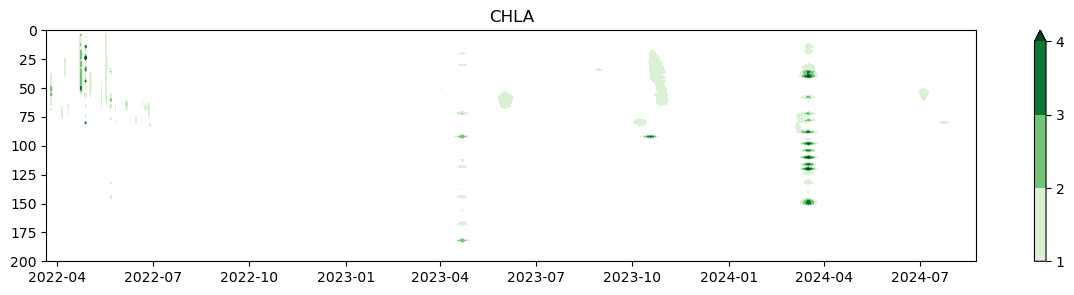

In [116]:
chla = argo.sel(pres=slice(0,200))
fig = plt.figure(figsize=(15,3))


ax = fig.add_subplot(111)
#ax.set_xlim(datetime(2024,3,1),datetime(2024,4,1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.invert_yaxis()
ax.set_title("CHLA")
cf = ax.contourf(chla["time"],
                 chla["pres"],
                 chla["CHLA"].values.T,cmap="Greens",
                 levels=np.arange(1,5),
                 extend="max",
                 )
fig.colorbar(
            cf,
            orientation="vertical",
        )


plt.show()

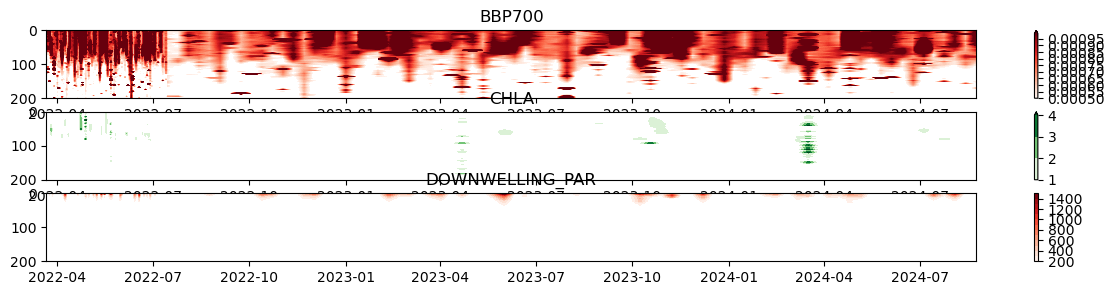

In [137]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(311)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.invert_yaxis()
ax.set_title("BBP700")
cf = ax.contourf(chla["time"],
                 chla["pres"],
                 chla["BBP700"].values.T,cmap="Reds",
                 levels=np.arange(5e-4,1e-3,1e-5),
                 extend="max",
                 )
fig.colorbar(
            cf,
            orientation="vertical",
        )

ax = fig.add_subplot(312)
#ax.set_xlim(datetime(2024,3,1),datetime(2024,4,1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.invert_yaxis()
ax.set_title("CHLA")
cf = ax.contourf(chla["time"],
                 chla["pres"],
                 chla["CHLA"].values.T,cmap="Greens",
                 levels=np.arange(1,5),
                 extend="max",
                 )
fig.colorbar(
            cf,
            orientation="vertical",
        )

ax = fig.add_subplot(313)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

ax.invert_yaxis()
ax.set_title("DOWNWELLING_PAR")
cf = ax.contourf(chla["time"],
                 chla["pres"],
                 chla["DOWNWELLING_PAR"].values.T,cmap="Reds",
                 levels=np.arange(200,1600,100),
                 #extend="max",
                 )
fig.colorbar(
            cf,
            orientation="vertical",
        )


plt.show()